# Hyperparameter tuning

Hyperparameter tuning is a crucial aspect of building machine learning models as it involves finding the optimal set of hyperparameters that maximize the model's performance. Here are some common techniques used for hyperparameter tuning:

Grid Search: Grid Search is a brute-force technique that involves defining a grid of hyperparameters and exhaustively searching all possible combinations of hyperparameters. It evaluates each combination using cross-validation and selects the combination that yields the best performance.

Random Search: Unlike Grid Search, Random Search randomly samples hyperparameters from specified distributions. It doesn't exhaustively search through all possible combinations but rather explores a larger portion of the hyperparameter space more efficiently. Random Search is particularly useful when the hyperparameter space is large and it's not feasible to explore all combinations.

Bayesian Optimization: Bayesian Optimization is an iterative optimization technique that builds a probabilistic model of the objective function (model performance) and uses this model to decide where to sample the next set of hyperparameters. It balances exploration (sampling in regions with uncertain outcomes) and exploitation (sampling in regions likely to yield good performance) to efficiently find the optimal set of hyperparameters.

Gradient-based Optimization: Gradient-based optimization techniques, such as gradient descent or its variants, can be used to optimize hyperparameters. In this approach, the objective function (model performance) is treated as a differentiable function of hyperparameters, and gradients with respect to the hyperparameters are computed to iteratively update them towards the optimal values.

##  Grid Search

Grid Search Cross-Validation combines Grid Search, a hyperparameter optimization technique, with Cross-Validation to systematically search through a specified grid of hyperparameters and select the best combination that yields the highest model performance.

Grid Search: Grid Search involves defining a grid of hyperparameters that you want to optimize. For example, if you're training a Support Vector Machine (SVM), you might want to optimize the kernel type and the value of the regularization parameter (C). You specify a range of values for each hyperparameter.

Cross-Validation: With Cross-Validation, you partition the dataset into training and validation sets. Then, you train the model on the training set and evaluate it on the validation set. This process is repeated multiple times with different partitions of the data, and the average performance is computed.

Grid Search with Cross-Validation: In Grid Search Cross-Validation, for each combination of hyperparameters in the grid:
    The dataset is split into training and validation sets.
    The model is trained on the training set.
    The performance of the model is evaluated on the validation set using a specified metric (e.g., accuracy, F1 score).
    This process is repeated for each fold in the Cross-Validation.
    The average performance across all folds is calculated for each hyperparameter combination.

Selecting the Best Model: After evaluating all combinations of hyperparameters, the combination that results in the highest average performance across all folds is selected as the best model.

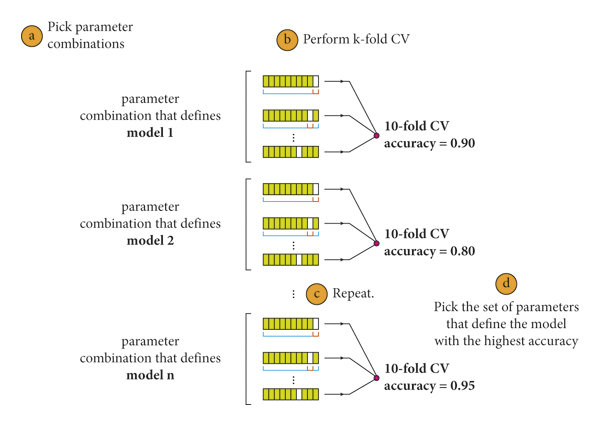

### Benefits of Grid Search Cross-Validation:


Systematic Exploration: Grid Search systematically explores the hyperparameter space, testing different combinations to find the optimal set.

Prevents Overfitting: By using Cross-Validation, Grid Search ensures that the hyperparameters selected generalize well to unseen data.

Optimal Model Selection: Grid Search helps in selecting the best model configuration based on performance metrics.

### Drawbacks of Grid Search Cross-Validation:


Computational Cost: Grid Search Cross-Validation can be computationally expensive, especially if the hyperparameter space is large or the dataset is large.

Exhaustive Search: Grid Search explores only the specified combinations in the grid and may miss out on potentially better hyperparameter configurations.

### Code

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search through
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}

# Instantiate the Support Vector Machine classifier
svm = SVC()

# Instantiate the GridSearchCV object with the SVM classifier and parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best Accuracy: 0.9583333333333334
Test Set Accuracy: 1.0


We first load the iris dataset and split it into training and testing sets.

We define a parameter grid for the Support Vector Machine (SVM) classifier, specifying different values for the regularization parameter 'C', the kernel coefficient 'gamma', and the kernel type 'kernel'.

We instantiate the SVM classifier.

We create a GridSearchCV object, passing the SVM classifier, parameter grid, number of folds for cross-validation (cv=5), and the scoring metric ('accuracy' in this case).

We fit the GridSearchCV object to the training data, which will perform cross-validation and search through the parameter grid to find the best combination of hyperparameters.

We retrieve the best parameters and best score from the grid search results.
Finally, we evaluate the best model on the test set to assess its performance on unseen data.

# Random Search


Random Search is another hyperparameter optimization technique used in machine learning, similar to Grid Search. However, instead of systematically searching through a predefined grid of hyperparameters, Random Search selects hyperparameter combinations at random from a specified search space.

Here's how Random Search works:

1) Define Search Space: You specify a search space for each hyperparameter, which can be a range of values, a list of discrete values, or a distribution from which values are sampled.

2) Randomly Sample Hyperparameters: Random Search randomly selects combinations of hyperparameters from the defined search space.

3) Evaluate Performance: Each combination of hyperparameters is evaluated using cross-validation or a separate validation set to estimate the model's performance.

5) Select Best Model: After evaluating a predefined number of combinations (or until a stopping criterion is met), the combination that yields the best performance metric is selected as the optimal model.

## Advantages of Random Search:



Efficient Exploration: Random Search efficiently explores the hyperparameter space by sampling from it randomly, potentially covering a wider range of values compared to Grid Search.

Computationally Less Expensive: Random Search is often less computationally expensive than Grid Search, especially when the hyperparameter space is large.

## Disadvantages of Random Search:

No Systematic Exploration: Unlike Grid Search, Random Search does not systematically explore the hyperparameter space, which may result in missing out on optimal combinations.

May Require More Evaluations: Random Search may require more evaluations (i.e., training and testing models) to find the optimal combination, especially if the search space is large.

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distributions to sample from
param_distributions = {
    'C': uniform(0.1, 10),        # Continuous uniform distribution between 0.1 and 10
    'gamma': uniform(0.001, 1),   # Continuous uniform distribution between 0.001 and 1
    'kernel': ['rbf', 'linear']   # Discrete choices for the kernel
}

# Instantiate the Support Vector Machine classifier
svm = SVC()

# Instantiate the RandomizedSearchCV object with the SVM classifier and parameter distributions
random_search = RandomizedSearchCV(svm, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'C': 3.845401188473625, 'gamma': 0.9517143064099162, 'kernel': 'rbf'}
Best Accuracy: 0.9583333333333334
Test Set Accuracy: 1.0


We define parameter distributions for the Support Vector Machine (SVM) classifier, specifying ranges for 'C' and 'gamma' as continuous uniform distributions, and a list of choices for 'kernel'.

We instantiate the RandomizedSearchCV object, specifying the SVM classifier, parameter distributions, number of iterations (n_iter=10), number of folds for cross-validation (cv=5), scoring metric ('accuracy'), and a random state for reproducibility.

We fit the RandomizedSearchCV object to the training data, which will randomly sample combinations of hyperparameters from the specified distributions and evaluate them using cross-validation.

We retrieve the best parameters and best score from the random search results.
Finally, we evaluate the best model on the test set to assess its performance on unseen data.